In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [ ]:
df=pd.read_csv('Twitter Product Sentiment Analysis.csv',encoding="ISO-8859-1")

In [ ]:
df.shape

(9873, 3)

In [ ]:
df.head()

,id,tweet,label
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,1.0
1,2,Finally a transparant silicon case ^^ Thanks t...,1.0
2,3,We love this! Would you go? #talk #makememorie...,1.0
3,4,I'm wired I know I'm George I was made that wa...,1.0
4,5,What amazing service! Apple won't even talk to...,0.0


In [ ]:
df['tweet'].isna().sum()

0

In [ ]:
df['tweet']=df['tweet'].str.lower()

In [ ]:
df['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [ ]:
df['tweet']=df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df.head()

,id,tweet,label
0,1,#fingerprint #pregnancy test #android #apps ...,1.0
1,2,finally a transparant silicon case ^^ thanks t...,1.0
2,3,we love this! would you go? #talk #makememorie...,1.0
3,4,i'm wired i know i'm george i was made that wa...,1.0
4,5,what amazing service! apple won't even talk to...,0.0


In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u"<3":"Heart",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
for i in df.index:
    df.at[i,'tweet']=convert_emoticons(df.at[i,'tweet'])

In [ ]:
df.head(30)

,id,tweet,label
0,1,#fingerprint #pregnancy test #android #apps ...,1.0
1,2,finally a transparant silicon case ^^ thanks t...,1.0
2,3,we love this! would you go? #talk #makememorie...,1.0
3,4,i'm wired i know i'm george i was made that wa...,1.0
4,5,what amazing service! apple won't even talk to...,0.0
5,6,iphone software update fucked up my phone big ...,0.0
6,7,happy for us .. #instapic #instadaily #us #son...,1.0
7,8,new type c charger cable #uk ?? #bay #amazo...,1.0
8,9,bout to go shopping again listening to music #...,1.0
9,10,photo: #fun #selfie #pool #water #sony #camera...,1.0


In [ ]:
df['tweet'].iloc[1]

'finally a transparant silicon case ^^ thanks to my uncle Happy_face_or_smiley #yay #sony #xperia #s #sonyexperias\x83??  '

In [ ]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

for i in df.index:
    df.at[i,'tweet']=chat_words_conversion(df.at[i,'tweet'])

In [ ]:
df.head(20)

,id,tweet,label
0,1,#fingerprint #pregnancy test #android #apps #b...,1.0
1,2,finally a transparant silicon case ^^ thanks t...,1.0
2,3,we love this! would you go? #talk #makememorie...,1.0
3,4,i'm wired i know i'm george i was made that wa...,1.0
4,5,what amazing service! apple won't even talk to...,0.0
5,6,iphone software update fucked up my phone big ...,0.0
6,7,happy for us .. #instapic #instadaily #us #son...,1.0
7,8,new type c charger cable #uk ?? #bay #amazon ...,1.0
8,9,bout to go shopping again listening to music #...,1.0
9,10,photo: #fun #selfie #pool #water #sony #camera...,1.0


In [ ]:
df['tweet'].iloc[13]

"i just made another crazy purchase Laughing Out Loud my theory is 'work hard, play hard' Laughing Out Loud #ipad #apple #shopping"

In [ ]:
df['tweet'].iloc[47]

'ahhhh look what i got for christmas Heart an #iphone #apple #christmas #girl'

In [ ]:
punctuations ='''!"$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
for i in df.index:
    my_str = df.at[i,'tweet']
    no_punct = ""
    for char in my_str:
       if char not in punctuations:
           no_punct = no_punct + char
    df.at[i,'tweet']=no_punct

In [ ]:
df['tweet'].iloc[2]

'we love this would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect'

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
for i in df.index:
    df.at[i,'tweet']=lemmatize_words(df.at[i,'tweet'])

In [ ]:
df.head()

,id,tweet,label
0,1,#fingerprint #pregnancy test #android #apps #b...,1.0
1,2,finally a transparant silicon case thanks to m...,1.0
2,3,we love this would you go #talk #makememories ...,1.0
3,4,im wired i know im george i wa made that way W...,1.0
4,5,what amazing service apple wont even talk to m...,0.0


In [ ]:
df['tweet'].iloc[3]

'im wired i know im george i wa made that way Winkorsmirk #iphone #cute #daventry #home'

In [ ]:
tokenized_tweet = df['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #pregnancy, test, #android, #ap...
1    [finally, a, transparant, silicon, case, thank...
2    [we, love, this, would, you, go, #talk, #makem...
3    [im, wired, i, know, im, george, i, wa, made, ...
4    [what, amazing, service, apple, wont, even, ta...
Name: tweet, dtype: object

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
all_words_positive = ' '.join(text for text in df['tweet'][df['label']==1])

In [ ]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask) 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


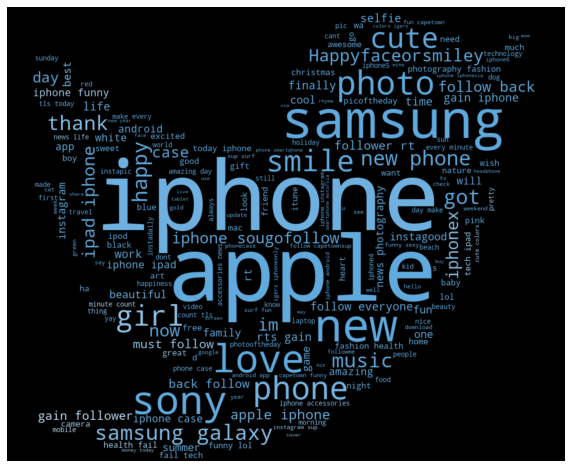

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()


In [ ]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [ ]:
ht_positive = Hashtags_Extract(df['tweet'][df['label']==1])

ht_positive

[['fingerprint',
  'pregnancy',
  'android',
  'apps',
  'beautiful',
  'cute',
  'health',
  'igers',
  'iphoneonly',
  'iphonesia',
  'iphone'],
 ['yay', 'sony', 'xperia', 's', 'sonyexperias'],
 ['talk',
  'makememories',
  'unplug',
  'relax',
  'iphone',
  'smartphone',
  'wifi',
  'connect'],
 ['iphone', 'cute', 'daventry', 'home'],
 ['instapic', 'instadaily', 'us', 'sony', 'xperia', 'xperiaz'],
 ['uk',
  'bay',
  'amazon',
  'etsy',
  'rob',
  'toby',
  'evemun',
  'mcmafia',
  'taylor',
  'spectre',
  'newyear',
  'starting',
  'recipes',
  'technology',
  'samsunggalaxys9',
  'iphonex'],
 ['iphone', 'justme', 'music', 'likeforlike', 'followforfollow'],
 ['fun',
  'selfie',
  'pool',
  'water',
  'sony',
  'camera',
  'picoftheday',
  'sun',
  'instagood',
  'boy',
  'cute',
  'outdoor'],
 ['ipad', 'apple', 'shopping'],
 ['deepellum',
  'downtown',
  'dallas',
  'bigd',
  'saturday',
  'rx100m3',
  'sony',
  'summer',
  'urban'],
 ['iphone', 's'],
 ['iphonesia',
  'iphone',
  'i

In [ ]:
ht_positive_unnest = sum(ht_positive,[])
ht_positive_unnest

['fingerprint',
 'pregnancy',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'yay',
 'sony',
 'xperia',
 's',
 'sonyexperias',
 'talk',
 'makememories',
 'unplug',
 'relax',
 'iphone',
 'smartphone',
 'wifi',
 'connect',
 'iphone',
 'cute',
 'daventry',
 'home',
 'instapic',
 'instadaily',
 'us',
 'sony',
 'xperia',
 'xperiaz',
 'uk',
 'bay',
 'amazon',
 'etsy',
 'rob',
 'toby',
 'evemun',
 'mcmafia',
 'taylor',
 'spectre',
 'newyear',
 'starting',
 'recipes',
 'technology',
 'samsunggalaxys9',
 'iphonex',
 'iphone',
 'justme',
 'music',
 'likeforlike',
 'followforfollow',
 'fun',
 'selfie',
 'pool',
 'water',
 'sony',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'cute',
 'outdoor',
 'ipad',
 'apple',
 'shopping',
 'deepellum',
 'downtown',
 'dallas',
 'bigd',
 'saturday',
 'rx100m3',
 'sony',
 'summer',
 'urban',
 'iphone',
 's',
 'iphonesia',
 'iphone',
 'instagood',
 'instagram',
 'photooftheday',
 'tweegram',
 

In [ ]:
ht_negative = Hashtags_Extract(df['tweet'][df['label']==0])
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['apple',
 'drinkyourhaterade',
 'cellcom',
 'depressing',
 'idontwantto',
 'hateorange',
 'iphone',
 'suck',
 'apple',
 'truth',
 'truthbetold',
 'agree',
 'fact',
 'realitycheck',
 'blackberrypictwittercomzpggd7cazn',
 'fuckingpissed',
 'apple',
 '6thiphone',
 'apple',
 'myloss',
 'apple',
 'soangry',
 'hateapple',
 'iphone',
 'apple',
 'sorry',
 'apple',
 'samsung',
 'tech',
 'win',
 'getalife',
 'apple',
 'tecshit',
 'fuckyou',
 'apple',
 'anotherangrycustomer',
 'apple',
 'hater',
 'yousuck',
 'briantong',
 'easytotalk',
 'producesomething',
 'korean',
 'loser',
 'sony',
 'apple',
 'ios7',
 'fuckyou',
 'sony',
 'ps3',
 'sodepressed',
 'samsunggalaxyftw',
 'loljk',
 'fail',
 'again',
 'makingmylifesodifficultpictwittercomlzs9zgi7sb',
 'apple',
 'usefuckingtorrent',
 'apple',
 'iphones',
 'samsung',
 'random',
 'apple',
 'apple',
 'getbetterbatteries',
 'geniusbar',
 'apple',
 'customercare',
 'batteries',
 'shitbirds',
 'colbertreport',
 'apple',
 'iwatch',
 'apple',
 'iphone',
 'i

In [ ]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)


,Hashtags,Count
0,fingerprint,4
1,pregnancy,1
2,android,336
3,apps,108
4,beautiful,208
5,cute,300
6,health,118
7,igers,149
8,iphoneonly,132
9,iphonesia,140


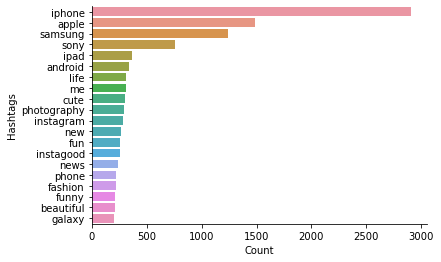

In [ ]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()


In [ ]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative.head(10)

,Hashtags,Count
0,apple,681
1,drinkyourhaterade,1
2,cellcom,1
3,depressing,1
4,idontwantto,1
5,hateorange,2
6,iphone,145
7,suck,37
8,truth,1
9,truthbetold,1


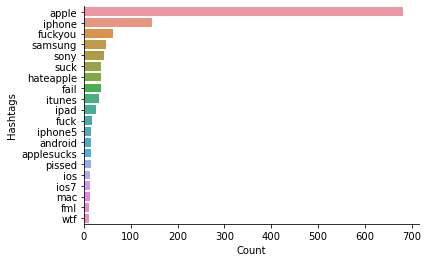

In [ ]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=None)

tfidf_matrix=tfidf.fit_transform(df['tweet'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf


,0,1,2,3,4,5,6,7,8,9,...,20949,20950,20951,20952,20953,20954,20955,20956,20957,20958
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_tfidf_matrix = tfidf_matrix[:8000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['label'].iloc[:8000]

In [ ]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,y,test_size=0.2,random_state=17)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf


0.8870716510903427

In [ ]:
test_tfidf = tfidf_matrix[8000:]
test_pred = dct.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

df['label'].iloc[8000:] = test_pred_int

submission = df[['id','tweet','label']].iloc[8000:]
submission.to_csv('result.csv', index=False)

/home/isha/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
submission

,id,tweet,label
8000,8001,this # happy af he just got his #galaxy4 mickj...,1.0
8001,8002,let make a laptop that ha no ventilation subst...,0.0
8002,8003,block story  #«¥ #android #games #news #ios ...,1.0
8003,8004,this siri commercial crack me up siri suck as ...,1.0
8004,8005,1800 ray ban rb4125 cat 5000 brown #good #mood...,1.0
...,...,...,...
9868,9869,#samsunggalaxynote7 explodes burn 6yearold tha...,1.0
9869,9870,now available hoodie check it out here  #ipho...,1.0
9870,9871,there go a crack right across the screen if yo...,0.0
9871,9872,codeofinterest a i said #adobe big time we may...,1.0


In [ ]:
print(df['tweet'].iloc[8043])
print(df['label'].iloc[8043])

we would like to wish you an amazing day make every minute count #tls #today #iphone #accessories #news #life november 30 2014 at
1.0


In [ ]:
column_names = ["Brand", "Positive", "Negative"]
df2 = pd.DataFrame(columns = column_names)
df2

,Brand,Positive,Negative


In [ ]:
x=df['tweet'].apply(lambda x: x.split())
ca1='apple'
ca2='iphone'
cs='samsung'
cso='sony'
cb='blackberry'
countpa=0
countna=0
countpcs=0
countncs=0
countpso=0
countnso=0
countpcb=0
countncb=0
for i in range(0,len(x)):
    if ca1 in x[i] or ca2 in x[i]:
        if df['label'].iloc[i]==1.0:
            countpa+=1
        else:
            countna+=1
    elif cs in x[i]:
        if df['label'].iloc[i]==1.0:
            countpcs+=1
        else:
            countncs+=1
    elif cso in x[i]:
        if df['label'].iloc[i]==1.0:
            countpso+=1
        else:
            countnso+=1
    elif cb in x[i]:
        if df['label'].iloc[i]==1.0:
            countpcb+=1
        else:
            countncb+=1


In [ ]:
df2=df2.append({'Brand':'Apple','Positive':countpa,'Negative':countna},ignore_index=True,verify_integrity=True)
df2=df2.append({'Brand':'Samsung','Positive':countpcs,'Negative':countncs},ignore_index=True,verify_integrity=True)
df2=df2.append({'Brand':'Sony','Positive':countpso,'Negative':countnso},ignore_index=True,verify_integrity=True)
df2=df2.append({'Brand':'Blackberry','Positive':countpcb,'Negative':countncb},ignore_index=True,verify_integrity=True)

In [ ]:
df2

,Brand,Positive,Negative
0,Apple,820,767
1,Samsung,110,17
2,Sony,64,13
3,Blackberry,11,2


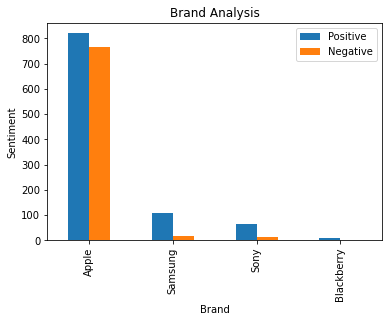

In [ ]:
df2.plot(x='Brand',y=['Positive','Negative'],kind='bar')
plt.legend()
plt.xlabel('Brand')
plt.ylabel('Sentiment')
plt.title('Brand Analysis')
plt.show()

In [ ]:
x={0:'negative',1:'positive'}
df['label']=df['label'].iloc[8000:].map(x)

In [ ]:
print(df['tweet'].iloc[8043])
print(df['label'].iloc[8043])

we would like to wish you an amazing day make every minute count #tls #today #iphone #accessories #news #life november 30 2014 at
positive


In [ ]:
print(df['tweet'].iloc[8019])
print(df['label'].iloc[8019])

like the freaking update say it only take up 11gb# apple #apple
negative
